##CLASIFICADOR IRIS CON KNN

JHON JAIRO CASTILLO CIFUENTES

2167742


In [16]:
#Se hace importacion de librerias necesarias para realizar el entrenamiento del modelo y analisis del dataset

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

A continuacion se descarga el dataset desde su repositorio y se lee para determinar como esta compuesto.

Podemos observar que el dataset contiene 4 caracteristicas de entrada y una de salida, con 150 muestras de diferentes flores donde se mide ancho y largo tanto del sepalo como del petalo con tal de determinar si una flor corresponde a la caracteristica iris-setosa, iris-verginica o iris-versicolor

In [20]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header=None,sep=',')
iris.columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
iris


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Luego realizamos una grafica de comparacion entre caracteristicas del modelo 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a9a10b990>,
      dtype=object)

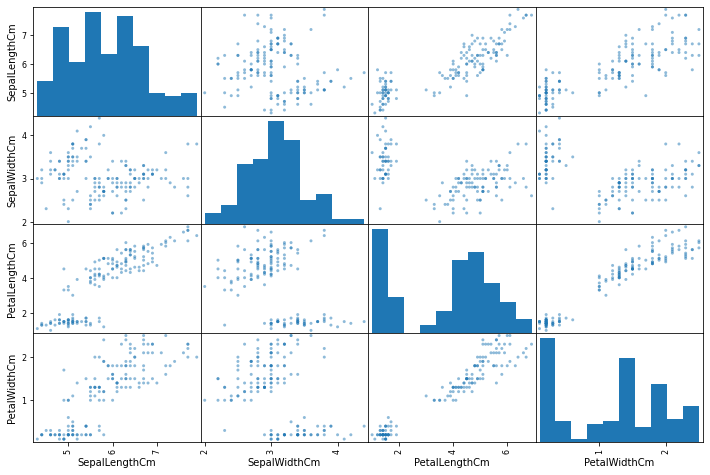

In [46]:
pd.plotting.scatter_matrix(iris, figsize=(12,8))

A continuacion se realiza la particion del dataset en datos de entrenamiento y validacion, cabe resaltar que no se realizo un proceso de normalizacion para esta tarea ya que al normalizar los modelos entrenados daban un buen accuracy incluso para modelos poco complejos, por lo que para un mejor analisis de la complejidad se realizo con el dataset sin normalizar

In [47]:
X = iris.iloc[:,0:4]  #Establece que mi matriz de entrada son las 4 primeras columnas
Y = iris.iloc[:,4]    #la ultima columna es la salida 

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3) #La particion se realiza en 30% datos de validacion y 70% de entreamiento

**MODELO 1 COMPLEJIDAD BAJA CON 50 VECINOS**

In [60]:

knn = KNeighborsClassifier(50) #Se crea el modelo basado en KNN con 50 vecinos
knn.fit(x_train, y_train)       #Se realiza el entrenamiento pasando x_train y y_train al modelo de KNN

#Se imprimen los accracy de entrenamiento y validacion de este modelo

print('Accuracy de clasificador K-NN para entrenamiento : {:.2f}'
     .format(knn.score(x_train, y_train)))  
print('Accuracy de clasificador K-NN para validacion: {:.2f}'
     .format(knn.score(x_test, y_test)))

Accuracy de clasificador K-NN para entrenamiento : 0.89
Accuracy de clasificador K-NN para validacion: 0.89


En este primer modelo se usa un alto numero de vecinos cercanos para realizar el entrenamiento, esto hace que el modelo tenga una complejidad baja, de este mismo se observa que los accuracy tanto de entrenamiento como de validacion son de 89% los cuales son bajos para clasificar adecuadamente el dataset dado, es decir hay underfiting

**MODELO 2 COMPLEJIDAD MEDIA CON 5 VECINOS**

In [61]:
knn2 = KNeighborsClassifier(5) #se crea un modelo con 5 vecinos para KNN
knn2.fit(x_train, y_train)

print('Accuracy de clasificador K-NN para entrenamiento : {:.2f}'
     .format(knn2.score(x_train, y_train)))  
print('Accuracy de clasificador K-NN para validacion: {:.2f}'
     .format(knn2.score(x_test, y_test)))

Accuracy de clasificador K-NN para entrenamiento : 0.97
Accuracy de clasificador K-NN para validacion: 0.98


Como podemos ver en este modelo se tiene un accuracy de 97% para entrenamiento y 0.98% para validación, estos mejoraron con respecto al modelo anterior y se puede decir que este modelo tiene buenos resultados tanto para entreanmiento como para validación.

**MODELO 3 COMPLEJIDAD ALTA CON 1 VECINO**

In [62]:
knn3 = KNeighborsClassifier(1) #se crea un modelo con 1 vecinos para KNN
knn3.fit(x_train, y_train)

print('Accuracy de clasificador K-NN para entrenamiento : {:.2f}'
     .format(knn3.score(x_train, y_train)))  
print('Accuracy de clasificador K-NN para validacion: {:.2f}'
     .format(knn3.score(x_test, y_test)))

Accuracy de clasificador K-NN para entrenamiento : 1.00
Accuracy de clasificador K-NN para validacion: 0.93


Para el ultimo modelo se uso el modelo mas complejo con 1 solo vecino para la predicción, podemos observar que para los datos de entrenamiento se tiene un accuracy del 100% sin embargo el accuracy de validacion descendio a 93% comparado con el modelo anterior, es decir hay overfiting 

Para ver con mejor claridad como se comporta el accuracy con respecto a la complejidad del modelo realizaremos el siguiente grafico


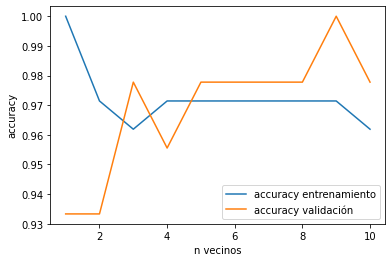

In [68]:
accu_entre=[] #crear vectores vacios para almacenar los accuracys al paso de las iteraciones
accu_val=[]

iteraciones= range (1, 11)

for n_neighbors in iteraciones: #actualiza el numero de vecinos para cada entrenamiento
  KNNmodel=KNeighborsClassifier(n_neighbors) #crea modelo para cada iteracion
  KNNmodel.fit(x_train,y_train) #entrena el modelo para cada iteracion

  accu_entre.append(KNNmodel.score(x_train,y_train)) #guardar los accuracy para entrenamiento y validacion de cada modelo
  accu_val.append(KNNmodel.score(x_test,y_test))

plt.plot(iteraciones,accu_entre,label="accuracy entrenamiento")
plt.plot(iteraciones,accu_val,label="accuracy validación")
plt.ylabel("accuracy")
plt.xlabel("n vecinos")
plt.legend()



De este grafico podemos apreciar como al disminuir la complejidad del modelo aumentando el numero de vecinos cercanos el accuracy de entrenamiento va disminuyendo y el accuracy de validacion aumentando, es por esto que a la hora de elegir el modelo a utilizar se debe tener en cuenta cual modelo presenta menos overfiting y underfiting.

De los anteriores modelos y grafica podemos deducir que un buen modelo para clasificar el dataset iris se encuentra en un rango de 4 a 7 vecinos, para terminos de el presente ejercicio se decidió utilizar el modelo numero 2 (5 vecinos cercanos) ya que es el modelo que presenta mejores resultados tanto para validacion y entrenamiento.

A continuacion se crea una matriz de confusion para entrenamiento y validacion para ver el comportamiento de este modelo clasificador.

In [69]:
def matriz_confusion(y_train,y_pred):  #definicion de funcion para matriz de confusion

  fig, ax = plt.subplots(figsize=(14,5),ncols=2,nrows=1)

  print('Accuracy: %.2f' % accuracy_score(y_train, y_pred))
  sns.heatmap(confusion_matrix(y_train, y_pred), fmt=".2f", annot=True, ax=ax[0]);   #se realiza el grafico de matriz de confusion 
  sns.heatmap(confusion_matrix(y_train, y_pred, normalize='true'), fmt=".2f", annot=True, ax=ax[1]); #se realiza el grafico de matriz de confusion con valores normalizados
  print(classification_report(y_train, y_pred))

**Datos de entrenamiento**

Accuracy: 0.97
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       0.97      0.94      0.96        35
 Iris-virginica       0.94      0.97      0.96        33

       accuracy                           0.97       105
      macro avg       0.97      0.97      0.97       105
   weighted avg       0.97      0.97      0.97       105



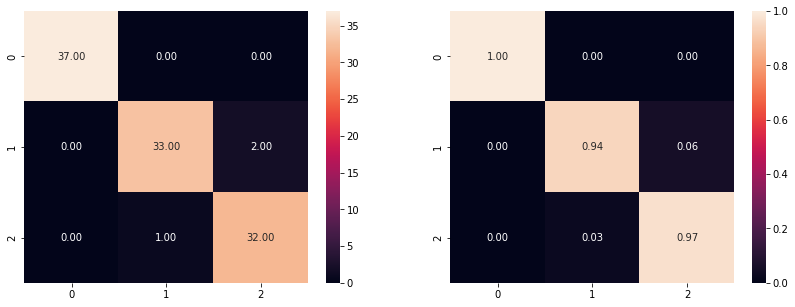

In [70]:
y_predT = knn2.predict(x_train)
matriz_confusion(y_train,y_predT)

La imagen anterior representa la matriz de confusion del modelo entrenado, con ella podemos ver que tan bien se hizo la clasificacion comparando los valores predichos con los valores de salida reales, en este ejercicio podemos ver como para los datos de entrenamiento se clasifico correctamente el 100% de los datos de la clase 0 (Iris-setosa) mientras que para la clase 1 (Iris-versicolor) hubo dos falsos positivos es decir 2 datos de esta clase los clasifico como si fueran de la clase 2 (Iris-verginica). Ademas se tiene un falso negativo de la clase 2 el cual fue clasificado como clase 1.

Ademas de esto podemos ver 2 metricas mas denominadas precision y recall

Precision: esta medida define que proporcion de predicciones positivas es correcta.

Recall: esta medida define que proporcion de valores reales se identifican correctamente.

Para este modelo se obtuvo una precision de 100% 97% y 94% para las clases 0, 1 y 2 correspondientemente y un recall de 100%,94% y 97% para las mismas categorias.


**Datos de validacion**


Accuracy: 0.98
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.94      1.00      0.97        17

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



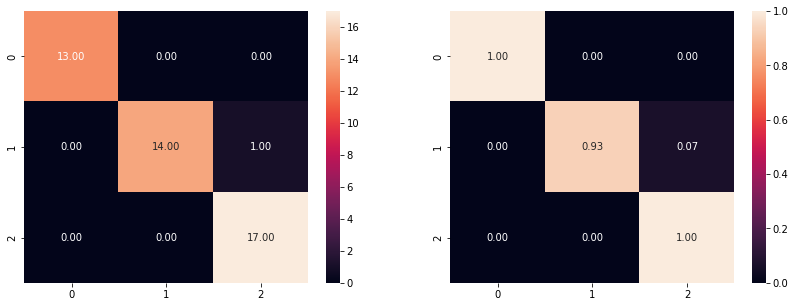

In [71]:
y_predV = knn2.predict(x_test)
matriz_confusion(y_test,y_predV)

por ultimo obtenemos la matriz de confusion para los datos de validacion del modelo 2 y podemos observar que solo hay un error de clasificacion en la clase 1 y que fue clasificado como clase 2.

para estos datos se obtuvo una presicion de 100%, 100% y 94% para las clases 0,1 y 2 correspondientemente y un recall de 100%, 93% y 100% para las mismas categorias.

**REFERENCIAS**

https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall?hl=es_419

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix

https://www.aprendemachinelearning.com/clasificar-con-k-nearest-neighbor-ejemplo-en-python/

https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html